**Classification**

# Imports

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from utils.logreg import simu_logreg
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_curve,
)


plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

# Sigmoid

In [ ]:
def sigmoid_first(t):
    """Implement the sigmoid function."""
    return  # TODO

In [3]:
def sigmoid(t):
    """Evaluate the Sigmoid function at t (overflow-proof)"""
    idx = t > 0
    out = np.empty(t.size)
    out[idx] = 1 / (1.0 + np.exp(-t[idx]))
    exp_t = np.exp(t[~idx])
    out[~idx] = exp_t / (1.0 + exp_t)
    return out

- we can also use the sigmoid function from scipy [scipy.special.expit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html#scipy.special.expit) which is numerically more stable than the naive implementation above

- Pytorch also has a built-in sigmoid function [torch.sigmoid](https://pytorch.org/docs/stable/generated/torch.sigmoid.html#torch.sigmoid) that we can use

- this is important for the softmax function as well, which we will see later in the course

- https://en.wikipedia.org/wiki/LogSumExp

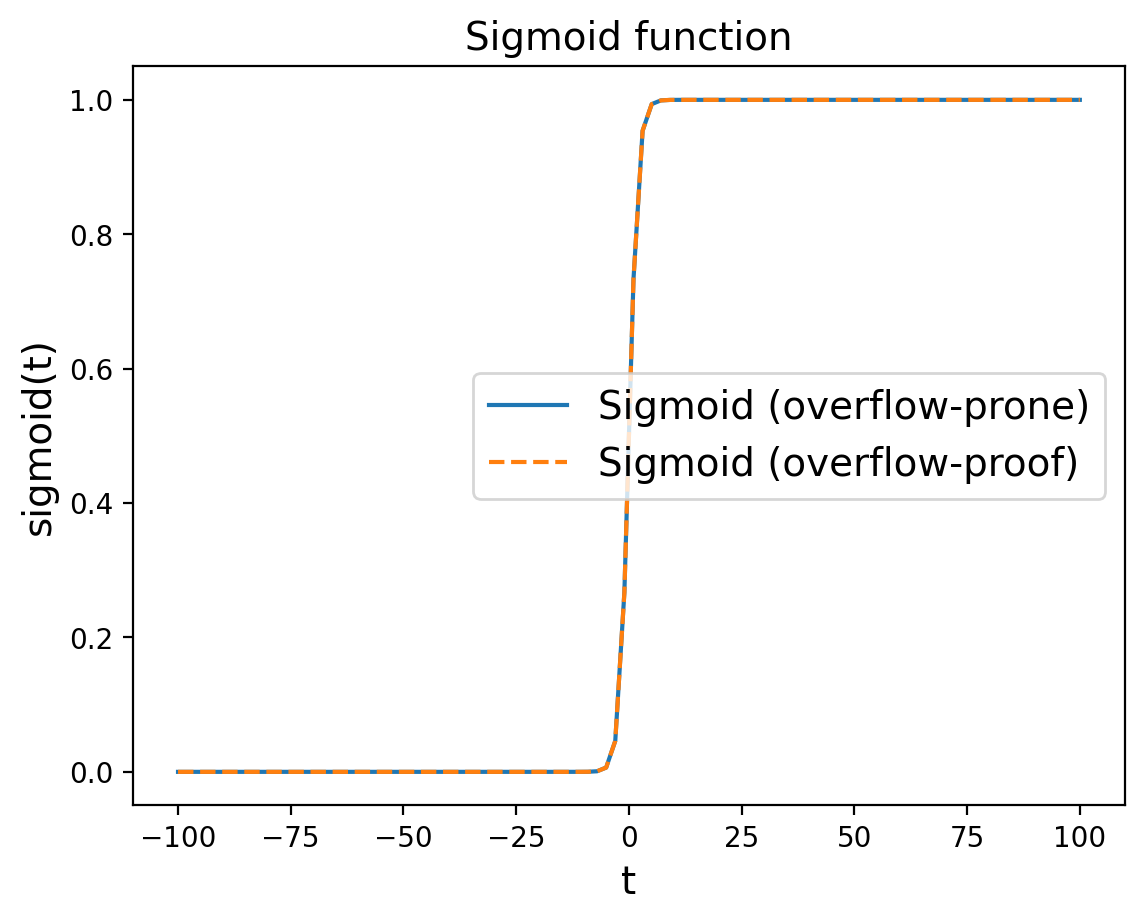

In [4]:
ts = np.linspace(-(10**2), 10**2, 100)
fig, ax = plt.subplots()
ax.plot(ts, sigmoid_first(ts), label="Sigmoid (overflow-prone)")
ax.plot(ts, sigmoid(ts), label="Sigmoid (overflow-proof)", linestyle="dashed")
ax.set_xlabel("t")
ax.set_ylabel("sigmoid(t)")
plt.title("Sigmoid function")
plt.legend()
plt.show()

# A First Example

In [5]:
# Simulate a logistic regression model with 2 features and 500 samples
n_samples = 500
w0 = np.array([-3.0, 3.0])
X, y = simu_logreg(w0, n_samples=n_samples, corr=0.4)

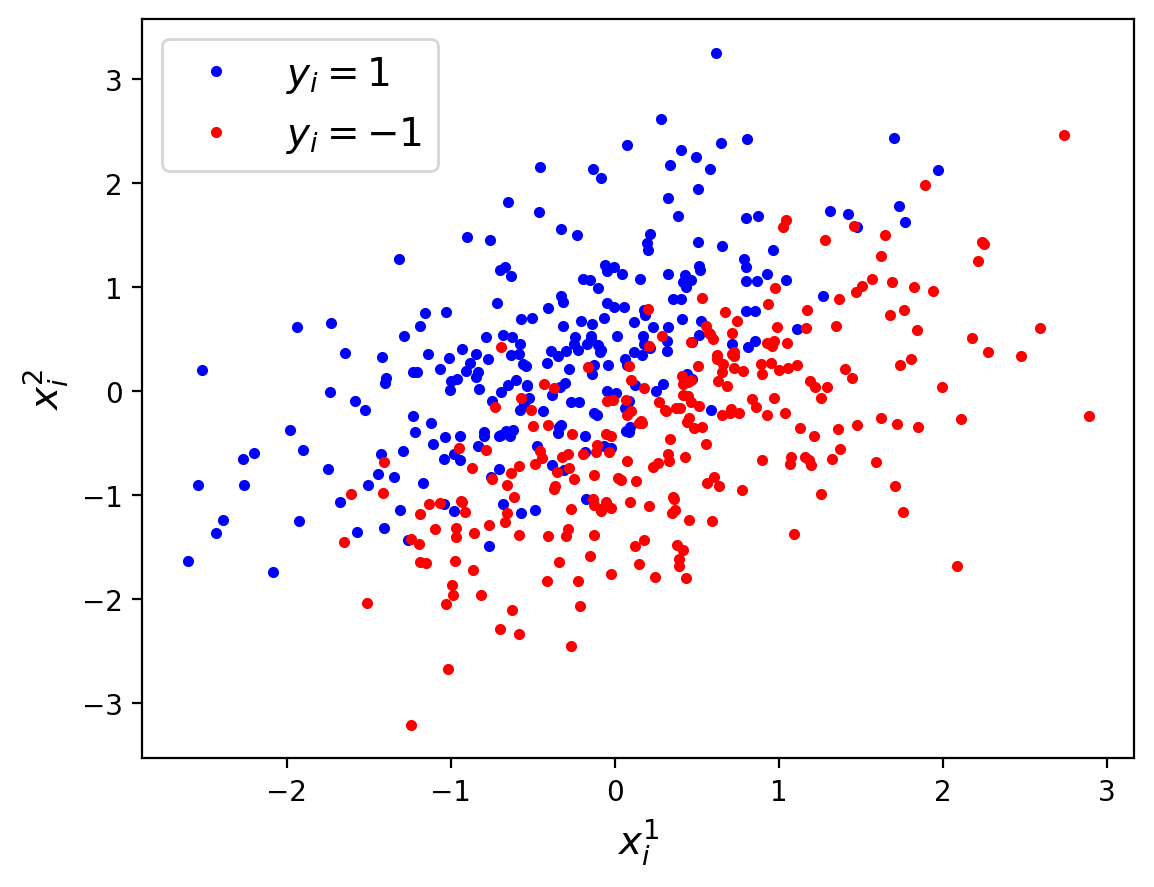

In [6]:
fig, ax = plt.subplots()
ax.plot(*X[y == 1].T, ".b", label=r"$y_i=1$")
ax.plot(*X[y == -1].T, ".r", label=r"$y_i=-1$")
ax.set_xlabel(r"$x_i^1$")
ax.set_ylabel(r"$x_i^2$")
ax.legend(loc="upper left")
plt.show()

In [7]:
X.shape

(500, 2)

In [8]:
y.shape

(500,)

In [ ]:
from sklearn.model_selection import train_test_split

# train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    # TODO, random_state=42, shuffle=True
)

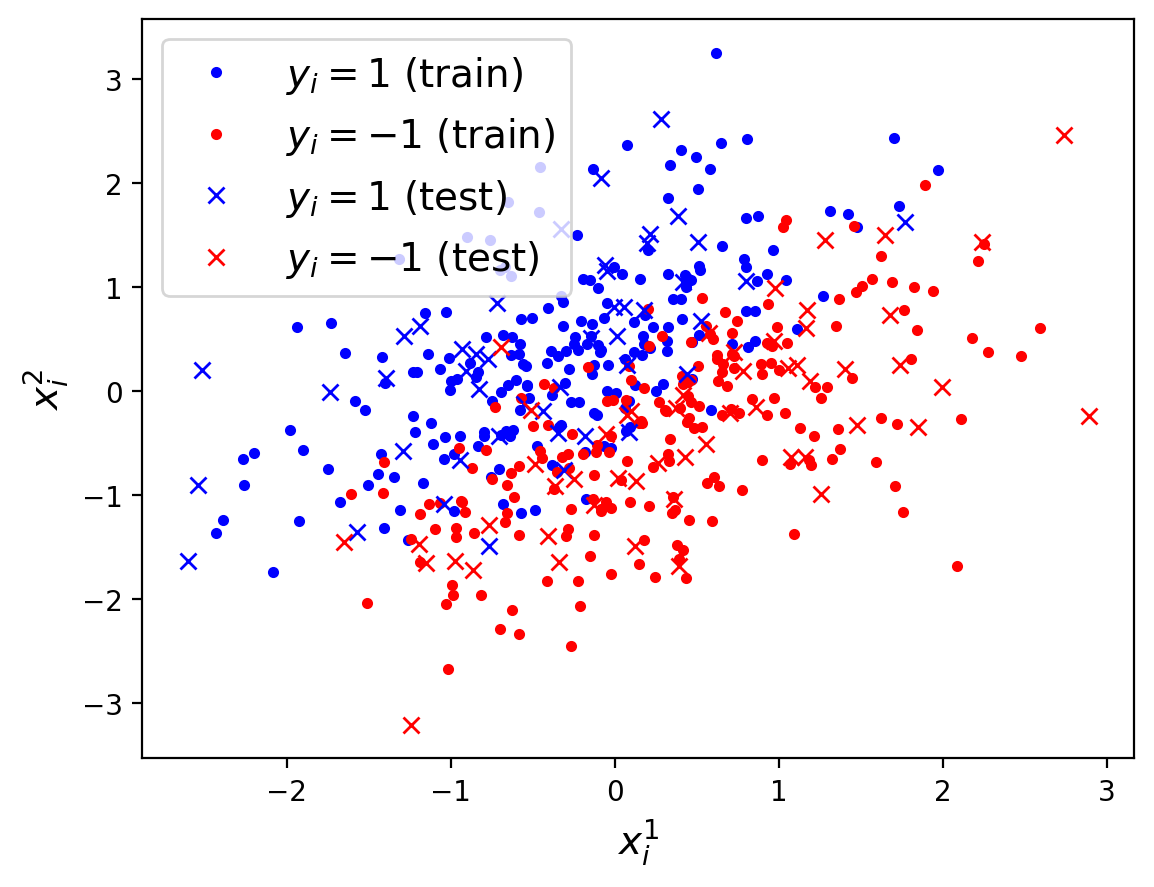

In [10]:
fig, ax = plt.subplots()
ax.plot(*X_train[y_train == 1].T, ".b", label=r"$y_i=1$ (train)")
ax.plot(*X_train[y_train == -1].T, ".r", label=r"$y_i=-1$ (train)")
ax.plot(*X_test[y_test == 1].T, "bx", label=r"$y_i=1$ (test)")
ax.plot(*X_test[y_test == -1].T, "rx", label=r"$y_i=-1$ (test)")
ax.set_xlabel(r"$x_i^1$")
ax.set_ylabel(r"$x_i^2$")
ax.legend(loc="upper left")
plt.show()

In [ ]:
# fit a logistic regression model on the training set
logreg_clf = #TODO
#TODO

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
# TODO

array([[-2.76974354,  2.84732916]])

In [ ]:
# Accuracy on the test set
# TODO

np.float64(0.86)

In [ ]:
# another direct way with the score method
# TODO

0.86

In [15]:
# other metrics
from sklearn.metrics import confusion_matrix, classification_report

y_pred = logreg_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.86      0.89      0.87        54
           1       0.86      0.83      0.84        46

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



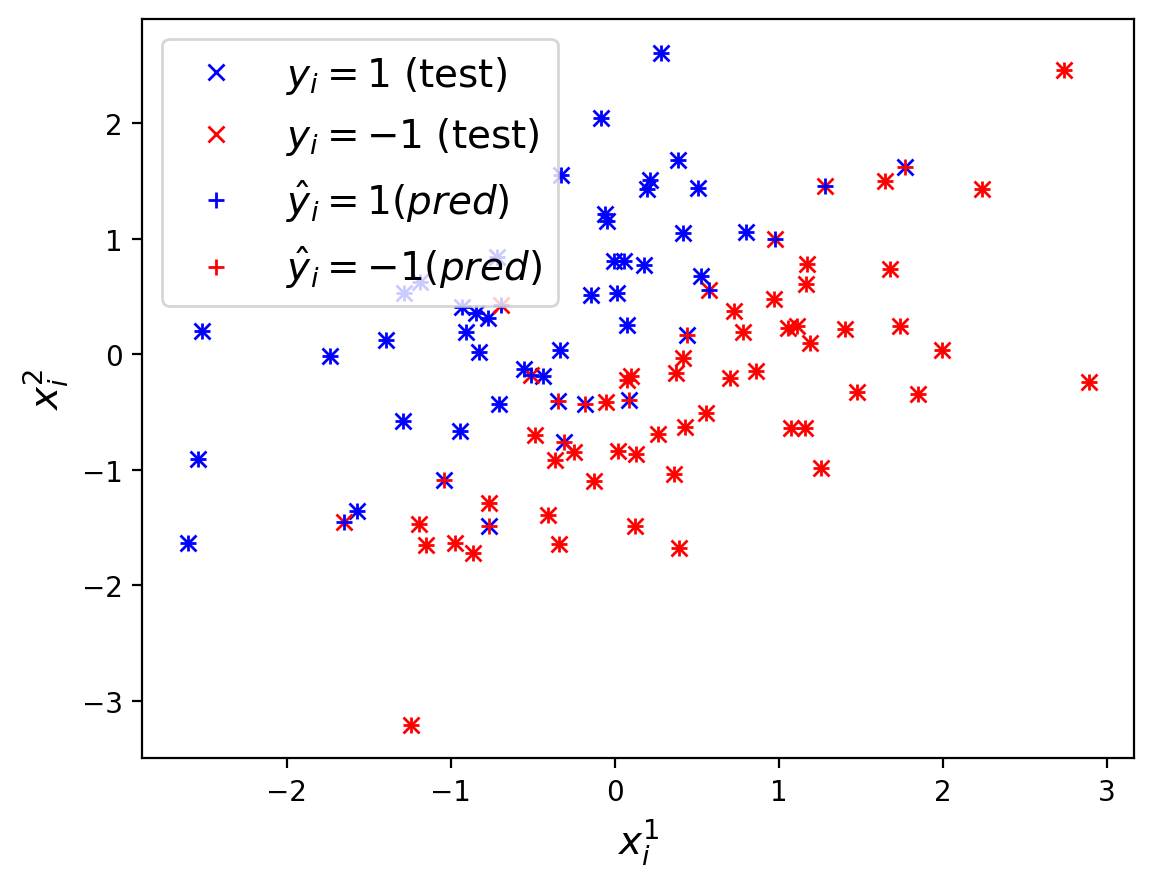

In [ ]:
fig, ax = plt.subplots()
ax.plot(*X_test[y_test == 1].T, "bx", label=r"$y_i=1$ (test)")
ax.plot(*X_test[y_test == -1].T, "rx", label=r"$y_i=-1$ (test)")
ax.plot(*X_test[logreg_clf.predict(X_test) == 1].T, "b+", label=r"$\hat{y}_i=1 (pred)$")
ax.plot(
    *X_test[logreg_clf.predict(X_test) == -1].T, "r+", label=r"$\hat{y}_i=-1 (pred)$"
)
ax.set_xlabel(r"$x_i^1$")
ax.set_ylabel(r"$x_i^2$")
ax.legend(loc="upper left")
plt.show()

In [ ]:
# dummy classifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
# most frequent is +1, so it predicts all samples as 1
print(X_train[y_train == 1].shape[0] / X_train.shape[0])
print(X_train[y_train == -1].shape[0] / X_train.shape[0])

0.5025
0.4975


In [ ]:
# dummy classifier
# TODO

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Evaluate the accuracy of the logistic regression classifier using k-fold
# cross-validation
k = 10
# TODO

array([0.8  , 0.925, 0.875, 0.775, 0.9  , 0.825, 0.85 , 0.875, 0.875,
       0.8  ])

In [37]:
# confusion matrix - we do not use the test set, but we use cross-validation to
# get predictions for the training set

y_train_pred = cross_val_predict(logreg_clf, X_train, y_train, cv=3)

In [39]:
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

[[171  28]
 [ 31 170]]


In [ ]:
# confusion matrix layout:
# [[TN, FP],
#  [FN, TP]]

# true negative = TN
print("True Negatives:", #TODO)

# false positives = FP
print("False Positives:", #TODO)

# false negatives = FN
print("False Negatives:", #TODO)

# true positives = TP
print("True Positives:", #TODO)

True Negatives: 171
False Positives: 28
False Negatives: 31
True Positives: 170


In [ ]:
# accuracy of the positive predictions = the precision of the classifier
# TP / (FP + TP)

print("Precision:", #TODO)

Precision: 0.8585858585858586


In [ ]:
# another metric: recall = TP / (FN + TP)
print("Recall:", #TODO)

Recall: 0.845771144278607


# MNIST

In [43]:
mnist = fetch_openml("mnist_784", as_frame=False)

In [44]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [45]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [46]:
# let us look at the mnist data
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [47]:
print("X.shape:", X.shape)

X.shape: (70000, 784)


In [48]:
print(y)

['5' '0' '4' ... '4' '5' '6']


In [49]:
print("y.shape:", y.shape)

y.shape: (70000,)


In [50]:
28 * 28

784

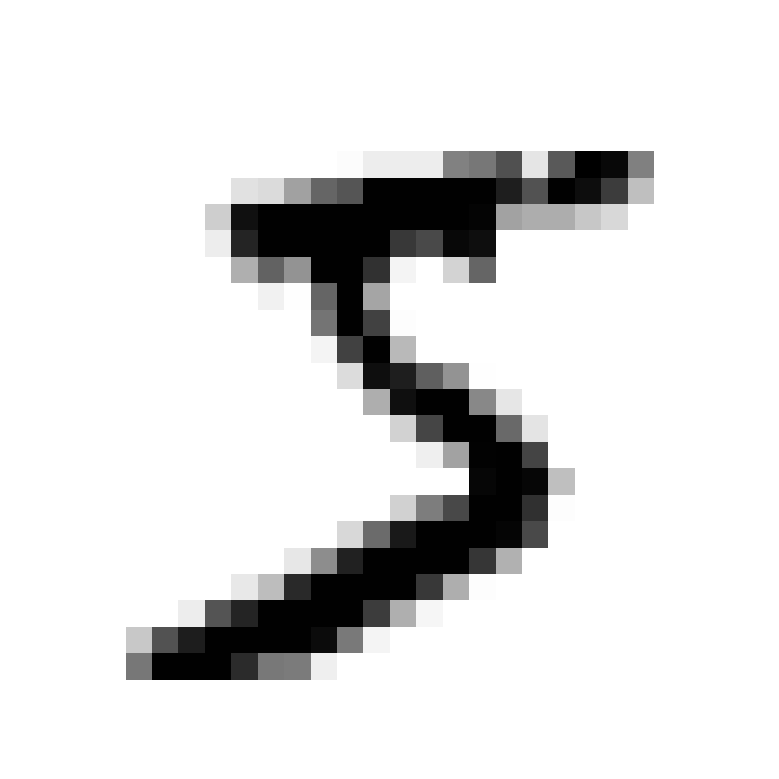

Label: 5


In [ ]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()


# plot digit with index idx
# TODO

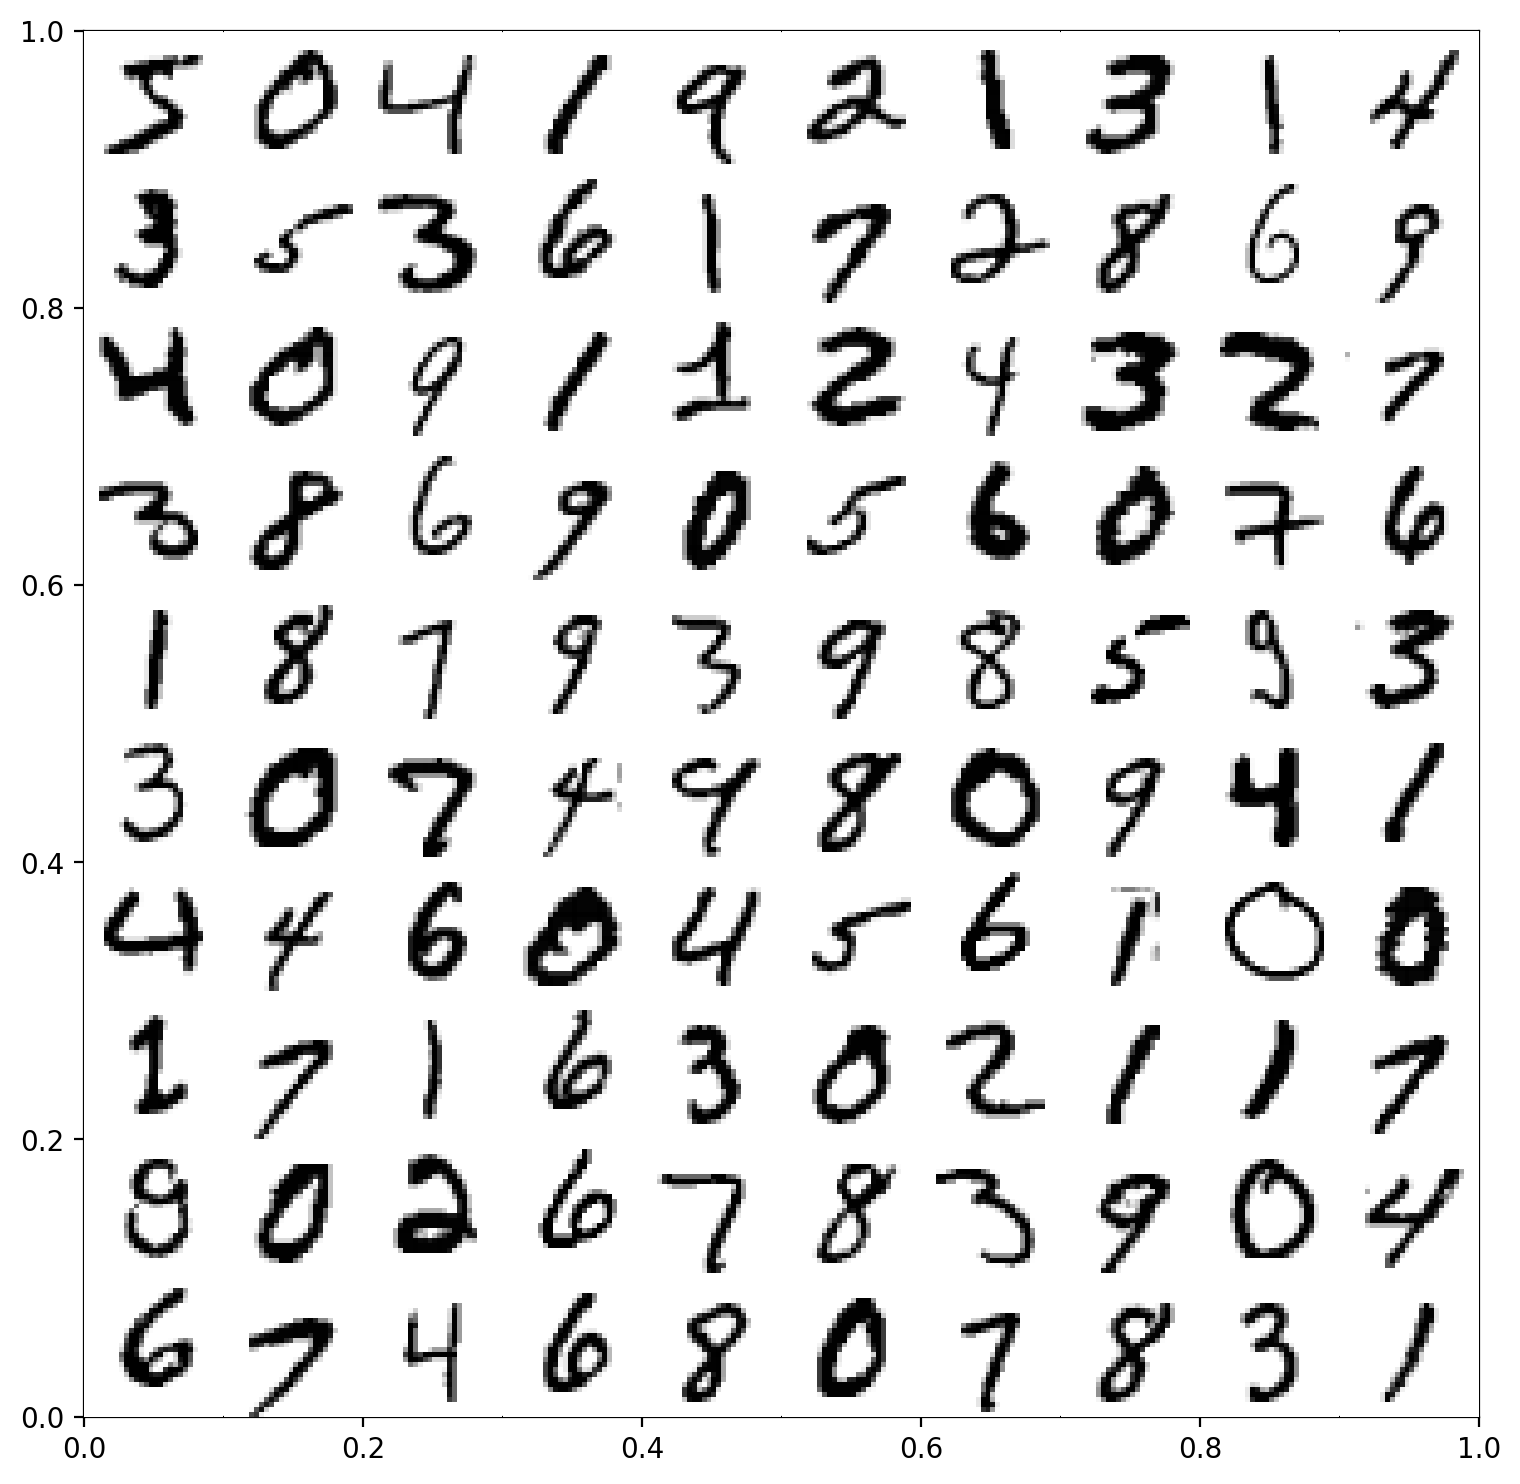

In [52]:
fig, ax = plt.subplots(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)

In [54]:
# split the data into a training set and a test set
# it is randomly shuffled, so we can just take the first 60000 samples as the training
# set and the last 10000 samples as the test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

In [ ]:
y_train_5 = #TODO  # True for all 5s, False for all other digits
y_test_5 = #TODO

In [59]:
from sklearn.linear_model import SGDClassifier

# look at the SGD classifier, which is a linear classifier that can be used for
# large datasets
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,"loss loss: {'hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='hinge'The loss function to be used.- 'hinge' gives a linear SVM.- 'log_loss' gives logistic regression, a probabilistic classifier.- 'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.- 'squared_hinge' is like hinge but is quadratically penalized.- 'perceptron' is the linear loss used by the perceptron algorithm.- The other losses, 'squared_error', 'huber', 'epsilon_insensitive' and 'squared_epsilon_insensitive' are designed for regression but can be useful in classification as well; see :class:`~sklearn.linear_model.SGDRegressor` for a description.More details about the losses formulas can be found in the :ref:`User Guide` and you can find a visualisation of the lossfunctions in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_loss_functions.py`.",'hinge'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [60]:
sgd_clf.predict([some_digit])

array([ True])

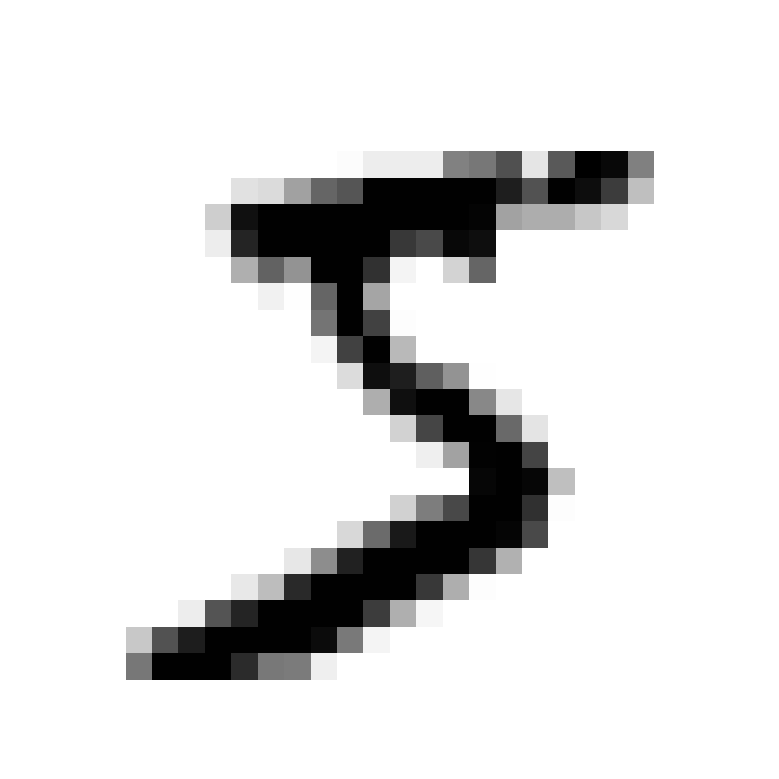

In [61]:
plot_digit(some_digit)

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [ ]:
# cross-validation with the SGD classifier and cv=3
# TODO

array([0.95035, 0.96035, 0.9604 ])

In [64]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is
# not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [65]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
# cross-validation with the SGD classifier and cv=3
# TODO

array([0.90965, 0.90965, 0.90965])

- The dummy classifier has over 90% accuracy.

- This is because the dataset is imbalanced, with 90% of the samples belonging to one class and only 10% belonging to the other class.

- Accuracy is not a good measure of performance in this case, as it can be misleading. A better measure of performance would be precision, recall, or the F1 score, which take into account the imbalance in the dataset.

## Confusion Matrix

In [ ]:
# confusion matrix - we do not use the test set, but we use cross-validation
# to get predictions for the training set
y_train_pred = #TODO

In [ ]:
cm = #TODO
cm

array([[53892,   687],
       [ 1891,  3530]])

In [71]:
print(f"TP: {cm[1, 1]}, FP: {cm[0, 1]}, TN: {cm[0, 0]}, FN: {cm[1, 0]}")

TP: 3530, FP: 687, TN: 53892, FN: 1891


In [72]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [75]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [77]:
# TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

np.float64(0.8370879772350012)

In [78]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [79]:
# TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

np.float64(0.6511713705958311)

In [81]:
# the F1 score is the harmonic mean of precision and recall
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [83]:
# f1 score
1 / (
    0.5 / precision_score(y_train_5, y_train_pred)
    + 0.5 / recall_score(y_train_5, y_train_pred)
)

0.7325171197343847

<img src="figures/confusion_matrix_mnist.png" width="800">

## Precision/Recall Trade-off

In [83]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-2866.61900497])

In [84]:
threshold = 0
y_some_digit_pred = y_scores > threshold

In [85]:
y_some_digit_pred

array([False])

In [86]:
# extra code – just shows that y_scores > 0 produces the same result as
#              calling predict()
y_scores > 0

array([False])

In [87]:
threshold = 3000
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([False])

In [88]:
y_scores = cross_val_predict(
    sgd_clf, X_train, y_train_5, cv=3, method="decision_function"
)

/Users/florianbourgey/projects/fre-gy-7773-mlfe/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:733: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/florianbourgey/projects/fre-gy-7773-mlfe/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:733: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/florianbourgey/projects/fre-gy-7773-mlfe/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:733: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [89]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

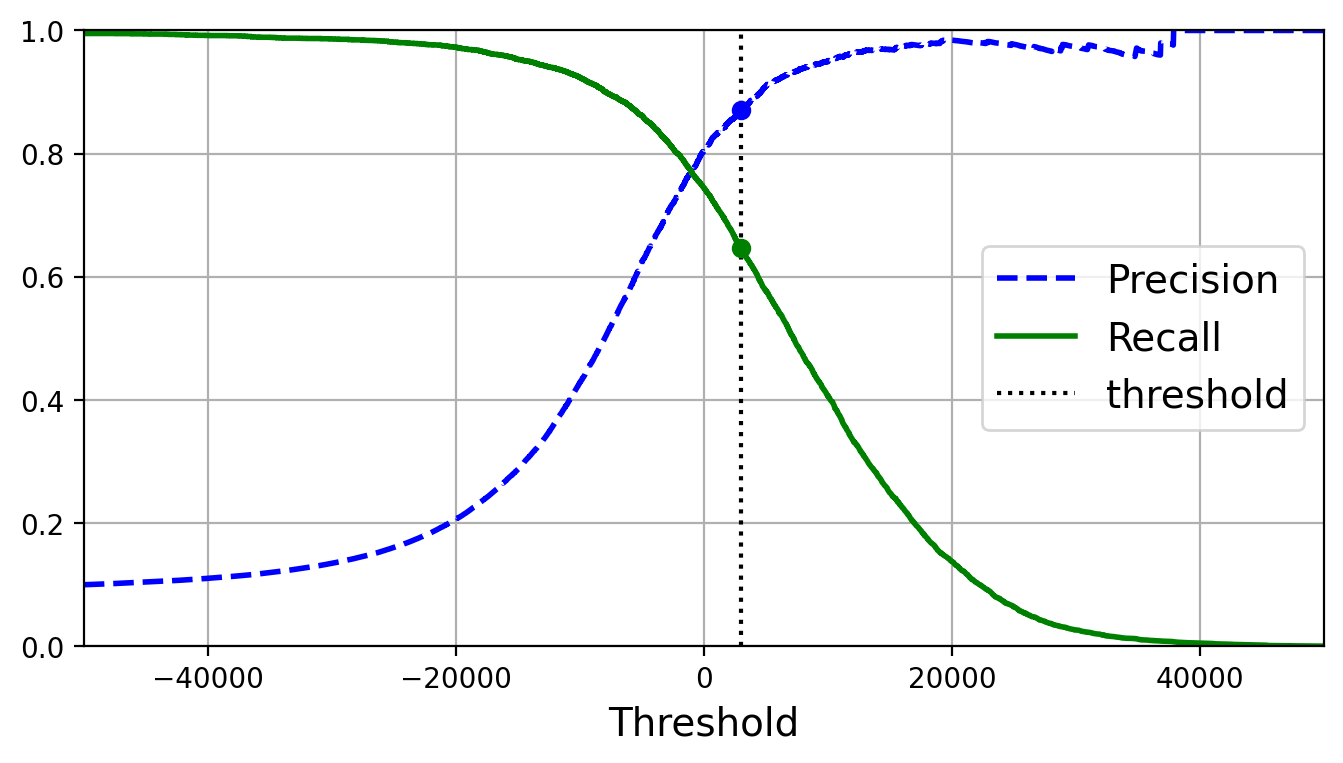

In [91]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

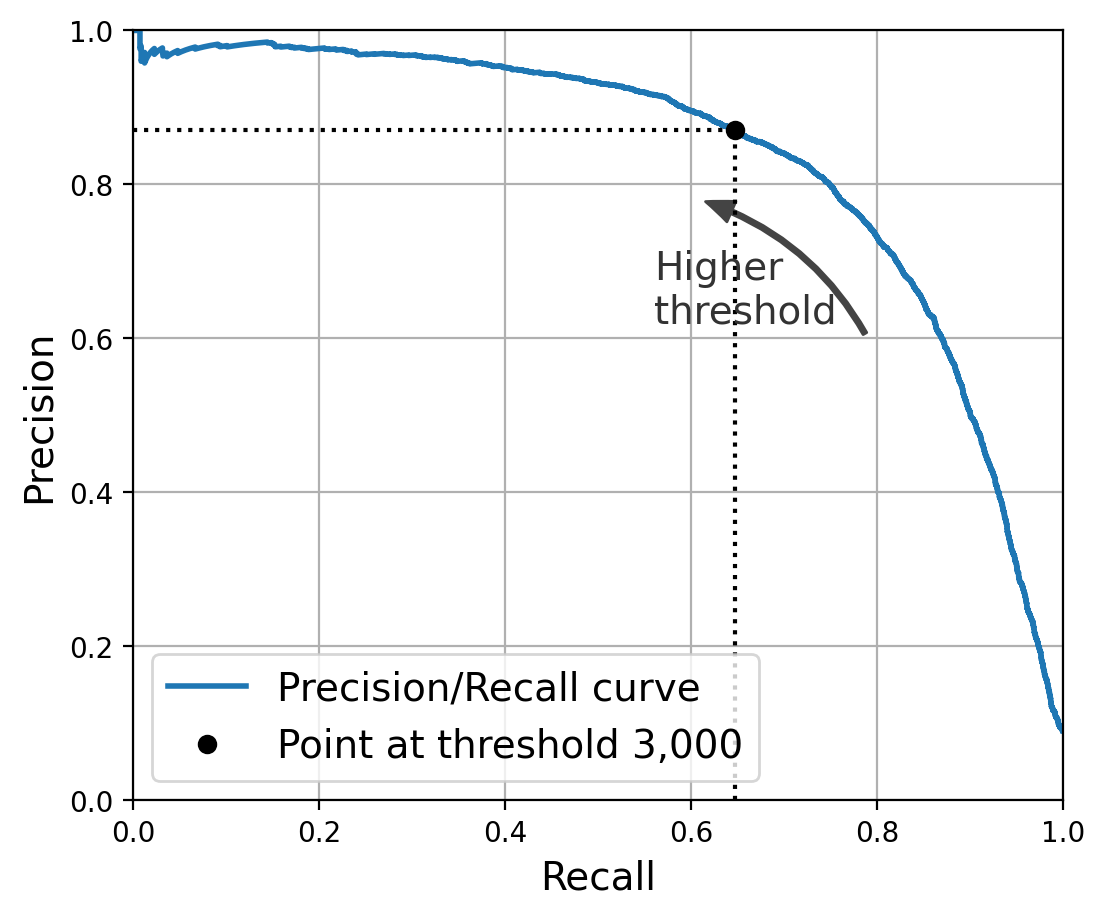

In [93]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0.0, precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko", label="Point at threshold 3,000")
plt.gca().add_patch(
    patches.FancyArrowPatch(
        (0.79, 0.60),
        (0.61, 0.78),
        connectionstyle="arc3,rad=.2",
        arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
        color="#444444",
    )
)
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [94]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(4570.861235724639)

In [95]:
y_train_pred_90 = y_scores >= threshold_for_90_precision

In [96]:
precision_score(y_train_5, y_train_pred_90)

0.900140252454418

In [97]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.5919572034679949

## The ROC Curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

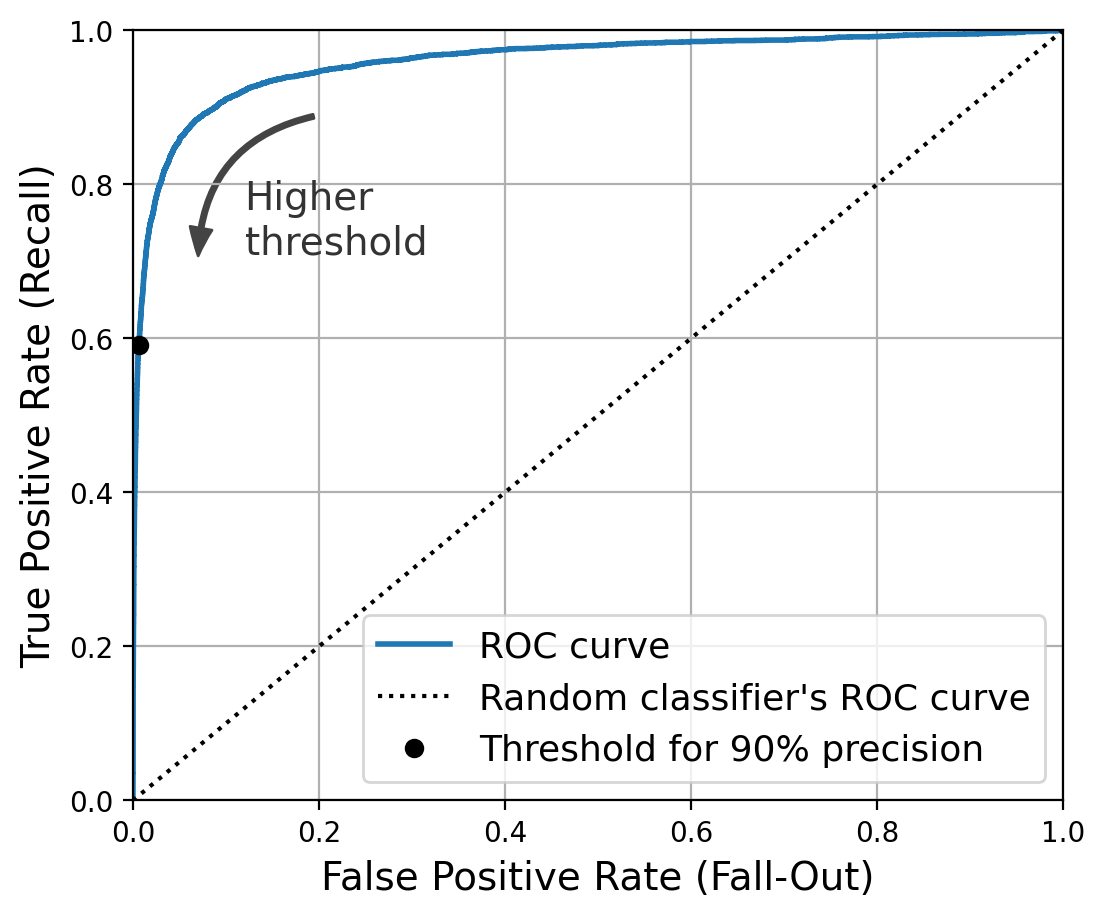

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], "k:", label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.gca().add_patch(
    patches.FancyArrowPatch(
        (0.20, 0.89),
        (0.07, 0.70),
        connectionstyle="arc3,rad=.4",
        arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
        color="#444444",
    )
)
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel("False Positive Rate (Fall-Out)")
plt.ylabel("True Positive Rate (Recall)")
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [100]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9599634584811508